# Project: tmdb-movies Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.



### Question(s) for Analysis
Questions:

what is the score of movies?

what is the profit of movies?max and min

what is the longest runtime and minimum?

what is the most successful genres and last one 




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling





In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15


### Data Cleaning

 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

release_year,release_date should be in type datetime 

In [7]:
df['release_year'] = pd.to_datetime(df['release_year'])
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes


id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year            datetime64[ns]
budget_adj                     float64
revenue_adj                    float64
dtype: object

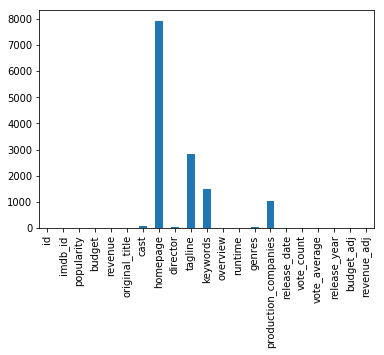

In [8]:
df.isna().sum().plot(kind="bar");


cast,director and genres have small number of none rows so we will drop them

homepage contain large number of missing data we will drop it and keywords also and will keep tagline to use it .


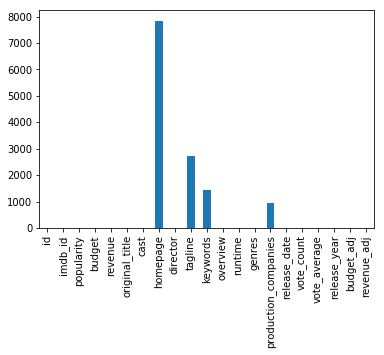

In [9]:
df.dropna(subset=['cast','genres','director'], inplace=True)
df.isna().sum().plot(kind="bar");


In [10]:
#df.genres.str.replace('|','-')

In [11]:
df.isnull().sum()




id                         0
imdb_id                    5
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7839
director                   0
tagline                 2730
keywords                1425
overview                   2
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

What about duplicates??

In [12]:
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} columns in it.'.format(rows-1, col))

There are now 10730 total entries of movies and 21 columns in it.


drop imdb_id,revenue_adj and budget_adj columns as they have a lot of missing values and i don't use them

Remove Zero values from revenue and budget column

In [13]:
del_col=[ 'budget_adj', 'revenue_adj', 'homepage', 'keywords','imdb_id']

#deleting the columns
df= df.drop(del_col,1)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,1970-01-01 00:00:00.000002015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,1970-01-01 00:00:00.000002015


In [14]:
temp = ['revenue','budget','runtime']
df[temp] = df[temp].replace(0,np.NaN)
#let's drop Them 
df.dropna(subset =temp,inplace =True)
#let's see our shape
df.shape

(3849, 16)

we continue with our data from (10866, 21) To (3855, 16)  it's a greet work


In [15]:
sortedData = df.sort_values(["release_year","vote_average"],ascending = [True,True])
sortedData

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10143,967,1.136943,12000000.0,6.000000e+07,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,Spartacus is a 1960 American historical drama ...,197.0,Action|Drama|History,Bryna Productions,2060-10-06,211,6.9,1970-01-01 00:00:00.000001960
10142,966,1.872132,2000000.0,4.905000e+06,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,An oppressed Mexican peasant village hires sev...,128.0,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,2060-10-23,224,7.0,1970-01-01 00:00:00.000001960
10170,18973,0.055821,3000000.0,7.100000e+06,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,This was Jerry Lewis' answer to the classic Ci...,91.0,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,2060-12-18,13,7.2,1970-01-01 00:00:00.000001960
10144,284,0.947307,3000000.0,2.500000e+07,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",Bud Baxter is a minor clerk in a huge New York...,125.0,Comedy|Drama|Romance,United Artists|The Mirisch Company,2060-06-15,235,7.9,1970-01-01 00:00:00.000001960
10141,539,2.610362,806948.0,3.200000e+07,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,When larcenous real estate clerk Marion Crane ...,109.0,Drama|Horror|Thriller,Shamley Productions,2060-08-14,1180,8.0,1970-01-01 00:00:00.000001960
10121,36362,0.282665,5037000.0,1.448335e+07,King of Kings,Jeffrey Hunter|SiobhÃ¡n McKenna|Hurd Hatfield|...,Nicholas Ray,"Of good and evil, of love and hate, of peace a...","Who is Jesus, and why does he impact all he me...",168.0,Drama,Metro-Goldwyn-Mayer (MGM)|Samuel Bronston Prod...,2061-10-11,10,5.9,1970-01-01 00:00:00.000001961
10130,18647,0.173731,6000000.0,4.300000e+06,One-Eyed Jacks,Marlon Brando|Karl Malden|Katy Jurado|Pina Pel...,Marlon Brando,NaN,Running from the law after a bank robbery in M...,141.0,Western|Action,Pennebaker Productions,2061-03-30,17,6.1,1970-01-01 00:00:00.000001961
10134,248,0.290285,2900000.0,5.000000e+06,Pocketful of Miracles,Glenn Ford|Bette Davis|Hope Lange|Arthur O'Con...,Frank Capra,You have to see it to believe it!,"Damon Runyon's fairytale, sweet and funny, is ...",136.0,Comedy|Drama,Franton Production,2061-12-18,10,6.1,1970-01-01 00:00:00.000001961
10124,28501,0.249542,200000.0,2.000000e+06,The Pit and the Pendulum,Vincent Price|John Kerr|Barbara Steele|Luana A...,Roger Corman,Betrayal cuts both ways!,"Francis Barnard goes to Spain, when he hears h...",80.0,Horror,Alta Vista Productions,2061-08-12,23,6.3,1970-01-01 00:00:00.000001961
10110,12230,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,When a litter of dalmatian puppies are abducte...,79.0,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,913,6.6,1970-01-01 00:00:00.000001961


In [16]:
sortedData.genres.value_counts(normalize=True)

Drama                                            0.063653
Comedy                                           0.060535
Drama|Romance                                    0.027799
Comedy|Romance                                   0.027020
Comedy|Drama|Romance                             0.023643
                                                   ...   
Action|Drama|Horror|Science Fiction|Thriller     0.000260
Mystery|Action|Drama|Thriller|Crime              0.000260
Family|Drama                                     0.000260
Thriller|Comedy|Drama|Romance|Science Fiction    0.000260
Crime|Mystery|Thriller|Action                    0.000260
Name: genres, Length: 1051, dtype: float64

In [17]:
scaledRateGraterOne = sortedData[sortedData['popularity'] >= 1]
min_vot = scaledRateGraterOne['vote_average'].min()
max_vot = scaledRateGraterOne['vote_average'].max()

sortedData[sortedData['vote_average'] == max_vot]

maxGenres = scaledRateGraterOne.genres.max()
sortedData[sortedData['genres']==maxGenres]

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
5,281957,9.1107,135000000.0,532950503.0,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)","In the 1820s, a frontiersman, Hugh Glass, sets...",156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,1970-01-01 00:00:00.000002015


<a id='eda'></a>
## Exploratory Data Analysis






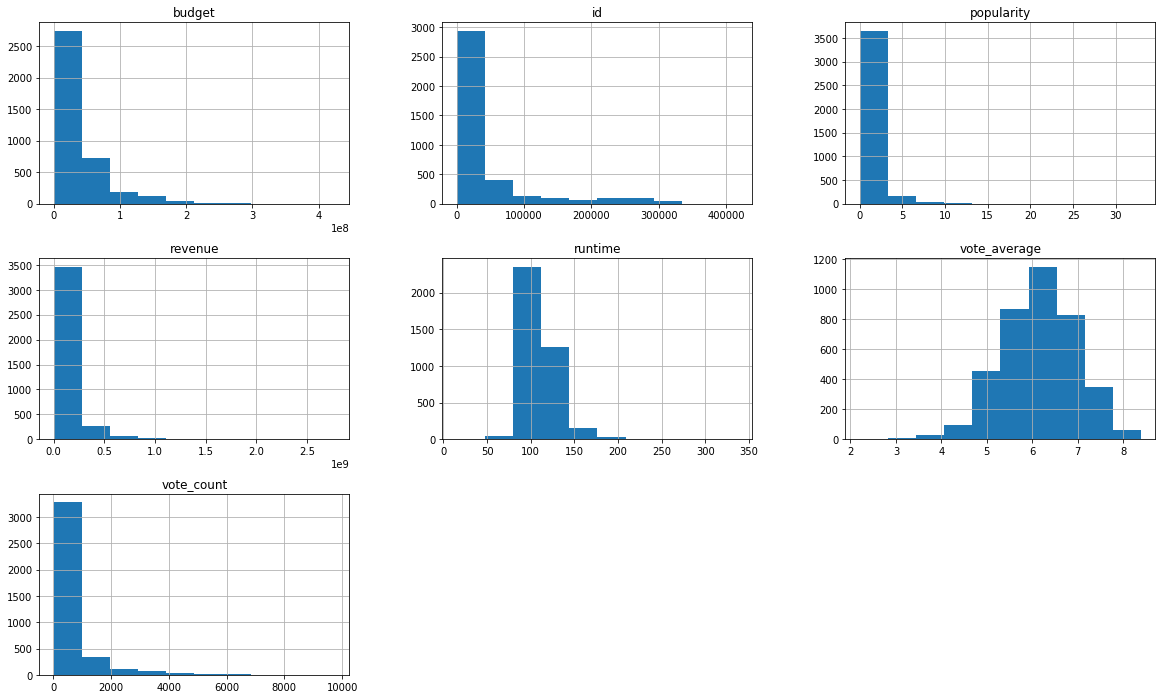

In [18]:
sortedData.hist(figsize=(20,12));

all the variables are right skeewed except vote_avrage which is normaly distributive 

In [19]:
#df1= sortedData.groupby(['genres'])[['id']].count().sort_values(by=['id'],ascending = False)[0:5]


#df_new1 = df1[df1['budget'] > 0]

#df_new1.boxplot(column=['budget'], by = ['genres']).set_yscale('log')
#plt.ylabel("multiple")
#pd.DataFrame(df_new1.groupby(['genres'])['budget'].describe().loc[:['mean','std']])


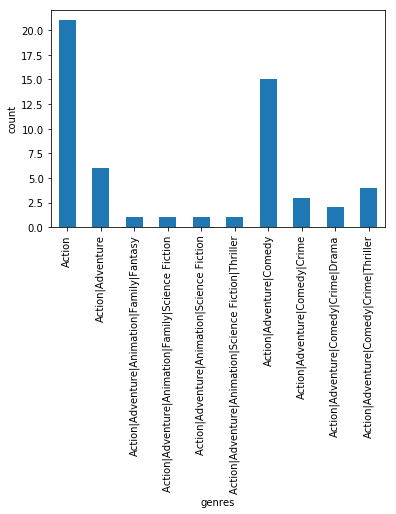

In [20]:
sortedData.groupby(['genres'])['id'].count()[0:10].plot(kind='bar').set_ylabel('count');


Action is the maximum in movies

Action/Adventure/animattion/Comedy/Family is the smallest one  

till now most movies lie in the range from 0 to 0.5 
the movies created all the year specially in junaurary and decamber is the most two months 
I will cut release_date to year ,day and month let's start

In [21]:
sortedData['year'] = sortedData['release_date'].dt.year
sortedData['month'] = sortedData['release_date'].dt.month
sortedData['day'] = sortedData['release_date'].dt.weekday_name
sortedData

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,month,day
10143,967,1.136943,12000000.0,6.000000e+07,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,Spartacus is a 1960 American historical drama ...,197.0,Action|Drama|History,Bryna Productions,2060-10-06,211,6.9,1970-01-01 00:00:00.000001960,2060,10,Wednesday
10142,966,1.872132,2000000.0,4.905000e+06,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,An oppressed Mexican peasant village hires sev...,128.0,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,2060-10-23,224,7.0,1970-01-01 00:00:00.000001960,2060,10,Saturday
10170,18973,0.055821,3000000.0,7.100000e+06,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,This was Jerry Lewis' answer to the classic Ci...,91.0,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,2060-12-18,13,7.2,1970-01-01 00:00:00.000001960,2060,12,Saturday
10144,284,0.947307,3000000.0,2.500000e+07,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",Bud Baxter is a minor clerk in a huge New York...,125.0,Comedy|Drama|Romance,United Artists|The Mirisch Company,2060-06-15,235,7.9,1970-01-01 00:00:00.000001960,2060,6,Tuesday
10141,539,2.610362,806948.0,3.200000e+07,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,When larcenous real estate clerk Marion Crane ...,109.0,Drama|Horror|Thriller,Shamley Productions,2060-08-14,1180,8.0,1970-01-01 00:00:00.000001960,2060,8,Saturday
10121,36362,0.282665,5037000.0,1.448335e+07,King of Kings,Jeffrey Hunter|SiobhÃ¡n McKenna|Hurd Hatfield|...,Nicholas Ray,"Of good and evil, of love and hate, of peace a...","Who is Jesus, and why does he impact all he me...",168.0,Drama,Metro-Goldwyn-Mayer (MGM)|Samuel Bronston Prod...,2061-10-11,10,5.9,1970-01-01 00:00:00.000001961,2061,10,Tuesday
10130,18647,0.173731,6000000.0,4.300000e+06,One-Eyed Jacks,Marlon Brando|Karl Malden|Katy Jurado|Pina Pel...,Marlon Brando,NaN,Running from the law after a bank robbery in M...,141.0,Western|Action,Pennebaker Productions,2061-03-30,17,6.1,1970-01-01 00:00:00.000001961,2061,3,Wednesday
10134,248,0.290285,2900000.0,5.000000e+06,Pocketful of Miracles,Glenn Ford|Bette Davis|Hope Lange|Arthur O'Con...,Frank Capra,You have to see it to believe it!,"Damon Runyon's fairytale, sweet and funny, is ...",136.0,Comedy|Drama,Franton Production,2061-12-18,10,6.1,1970-01-01 00:00:00.000001961,2061,12,Sunday
10124,28501,0.249542,200000.0,2.000000e+06,The Pit and the Pendulum,Vincent Price|John Kerr|Barbara Steele|Luana A...,Roger Corman,Betrayal cuts both ways!,"Francis Barnard goes to Spain, when he hears h...",80.0,Horror,Alta Vista Productions,2061-08-12,23,6.3,1970-01-01 00:00:00.000001961,2061,8,Friday
10110,12230,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,When a litter of dalmatian puppies are abducte...,79.0,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,913,6.6,1970-01-01 00:00:00.000001961,2061,1,Tuesday


### Research Question 1 (what is the score of the movie)

we can use vote but that not  fair as movie tallk 9.8 for example rating and 400 vote not good than movie with 5.8 rating and 40000 vote 
so i will use simple equation to get the score depending on 
-mean of vote 
-vote avg
-vote count 


In [22]:
vote_avg = sortedData['vote_average'].mean()
vote_avg


6.168693167056379

So, the mean rating for all the movies is approx 6 on a scale of 10.

In [23]:
vote_count = sortedData['vote_count'].quantile(0.9)

#which movie will be with us?

sel_movies = sortedData.copy().loc[sortedData['vote_count'] >= vote_count]
sel_movies.shape[0]

385

their are 1088 movie will be with us with rating at least than 90% votes

In [24]:
def weighted_rating(x, m=vote_count, C=vote_avg):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [25]:
sel_movies['score'] =sel_movies.apply(weighted_rating, axis=1)


In [26]:
sel_movies = sel_movies.sort_values('score', ascending=False)

#Print the top 15 movies
sel_movies[['original_title','vote_count', 'vote_average', 'score']].head(10)


,original_title,vote_count,vote_average,score
4178,The Shawshank Redemption,5754,8.4,7.970346
2875,The Dark Knight,8432,8.1,7.829693
7269,The Godfather,3970,8.3,7.752552
2409,Fight Club,5923,8.1,7.736728
4177,Pulp Fiction,5343,8.1,7.705352
1919,Inception,9767,7.9,7.686726
629,Interstellar,6498,8.0,7.680705
4179,Forrest Gump,4856,8.1,7.674494
4949,The Lord of the Rings: The Return of the King,5636,7.9,7.561011
630,Guardians of the Galaxy,5612,7.9,7.559847


In [ ]:
The Shawshank Redemption has largest score 

### Research Question 2  (what is the profit for each movie (min and max))


In [27]:
# Continue to explore the data to address your additional research
#we can get the profit of the movie by using this eqation
#profit = revenue - budget
sortedData['profit'] = sortedData['revenue'] - sortedData['budget']
sortedData.head(20)

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,month,day,profit
10143,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,Spartacus is a 1960 American historical drama ...,197.0,Action|Drama|History,Bryna Productions,2060-10-06,211,6.9,1970-01-01 00:00:00.000001960,2060,10,Wednesday,48000000.0
10142,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,An oppressed Mexican peasant village hires sev...,128.0,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,2060-10-23,224,7.0,1970-01-01 00:00:00.000001960,2060,10,Saturday,2905000.0
10170,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,This was Jerry Lewis' answer to the classic Ci...,91.0,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,2060-12-18,13,7.2,1970-01-01 00:00:00.000001960,2060,12,Saturday,4100000.0
10144,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",Bud Baxter is a minor clerk in a huge New York...,125.0,Comedy|Drama|Romance,United Artists|The Mirisch Company,2060-06-15,235,7.9,1970-01-01 00:00:00.000001960,2060,6,Tuesday,22000000.0
10141,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,When larcenous real estate clerk Marion Crane ...,109.0,Drama|Horror|Thriller,Shamley Productions,2060-08-14,1180,8.0,1970-01-01 00:00:00.000001960,2060,8,Saturday,31193052.0
10121,36362,0.282665,5037000.0,14483352.0,King of Kings,Jeffrey Hunter|SiobhÃ¡n McKenna|Hurd Hatfield|...,Nicholas Ray,"Of good and evil, of love and hate, of peace a...","Who is Jesus, and why does he impact all he me...",168.0,Drama,Metro-Goldwyn-Mayer (MGM)|Samuel Bronston Prod...,2061-10-11,10,5.9,1970-01-01 00:00:00.000001961,2061,10,Tuesday,9446352.0
10130,18647,0.173731,6000000.0,4300000.0,One-Eyed Jacks,Marlon Brando|Karl Malden|Katy Jurado|Pina Pel...,Marlon Brando,NaN,Running from the law after a bank robbery in M...,141.0,Western|Action,Pennebaker Productions,2061-03-30,17,6.1,1970-01-01 00:00:00.000001961,2061,3,Wednesday,-1700000.0
10134,248,0.290285,2900000.0,5000000.0,Pocketful of Miracles,Glenn Ford|Bette Davis|Hope Lange|Arthur O'Con...,Frank Capra,You have to see it to believe it!,"Damon Runyon's fairytale, sweet and funny, is ...",136.0,Comedy|Drama,Franton Production,2061-12-18,10,6.1,1970-01-01 00:00:00.000001961,2061,12,Sunday,2100000.0
10124,28501,0.249542,200000.0,2000000.0,The Pit and the Pendulum,Vincent Price|John Kerr|Barbara Steele|Luana A...,Roger Corman,Betrayal cuts both ways!,"Francis Barnard goes to Spain, when he hears h...",80.0,Horror,Alta Vista Productions,2061-08-12,23,6.3,1970-01-01 00:00:00.000001961,2061,8,Friday,1800000.0
10110,12230,2.631987,4000000.0,215880014.0,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,When a litter of dalmatian puppies are abducte...,79.0,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,913,6.6,1970-01-01 00:00:00.000001961,2061,1,Tuesday,211880014.0


id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year            datetime64[ns]
year                             int64
month                            int64
day                             object
profit                         float64
dtype: object

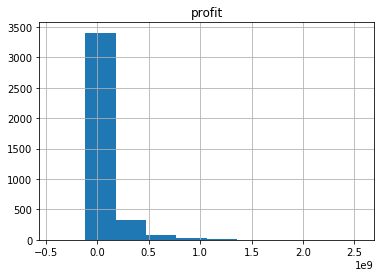

In [28]:
sortedData.hist(column ='profit');
sortedData.dtypes

profit in minus so some of movies are lose and not get enough success

In [29]:
import pprint

def calculateState(columnName):
    '''take columnName return maxvalue and minValue in formate of dataFrame'''
    maxProfit = sortedData[columnName].idxmax()
    maxInfo = pd.DataFrame(sortedData.loc[maxProfit])
    
    minProfit = sortedData[columnName].idxmin()
    minInfo = pd.DataFrame(sortedData.loc[minProfit])
    #we will concate them together to display them in df formate
    info=pd.concat([maxInfo, minInfo], axis=1)
    return info
calculateState(columnName = 'profit')    

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,162,100


movie with id 1386 have the maximum number of profit  (2.54451e+09) and in the other side 2244 have the smallest number of profit 	-4.13912e+08  in minus which mean this movie loss a lot 

Let's reuse our function to make more questions :
Research Question 3 (what is the budget for each movie (min and max))

In [30]:
calculateState(columnName = 'budget')    

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
overview,An Asian assassin (Dong-gun Jang) is forced to...,A comedy about finding your true love at any p...
runtime,100,95


(2618) with 1 it's not considered number so small and 2244 with (4.25e+08) 

if you note this point id number 2244 have max budget but lowest profit ? and they have strog correletion  and positive


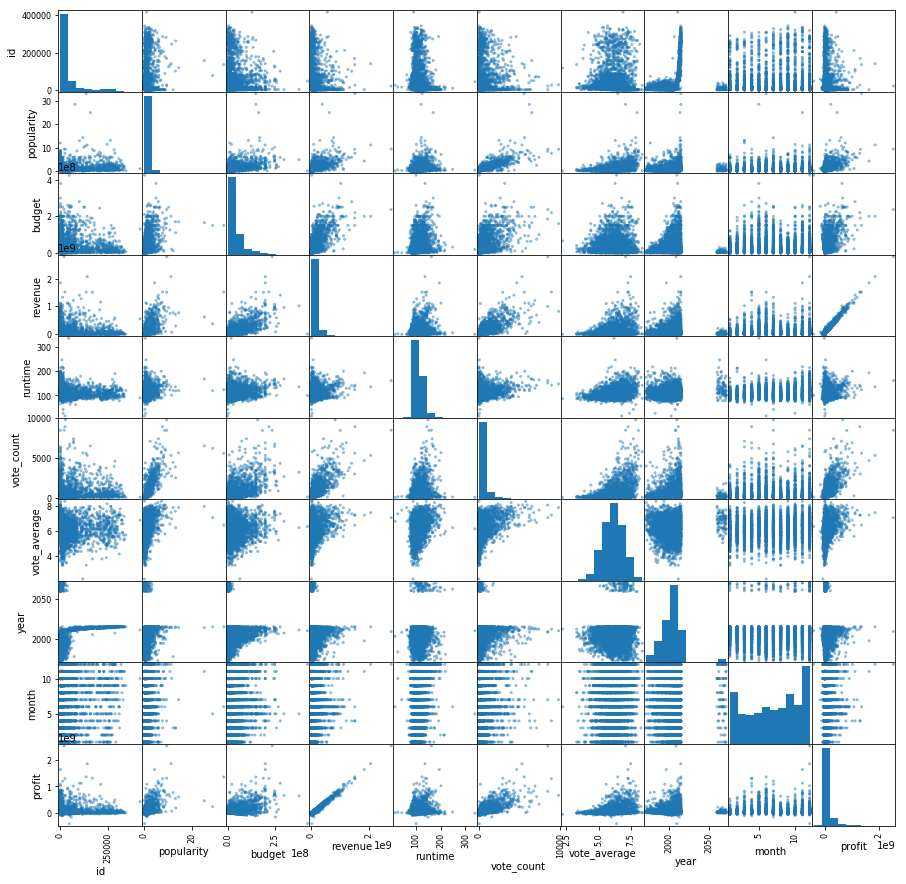

In [31]:
pd.plotting.scatter_matrix(sortedData, figsize = (15,15));


1:their exist  strong relation between revenue and profit positve corrolation

2:profit and popularity have positive but low corolation

3: populaarity and vote have low corr but positve

4:budget and runtime low corr but positive

4:vote avrage and runtime low corr but positive
5: popularity and runtime week corr and positve 

## # 3:what is the longest runtime and minimum?

In [32]:
maxRunTiem = sortedData['runtime'].max()
sortedData[sortedData.runtime == maxRunTiem]

# also we can direct use calculateState('runtime')




,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,month,day,profit
2107,43434,0.534192,18000000.0,871279.0,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,"The story of Venezuelan revolutionary, Ilich R...",338.0,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,1970-01-01 00:00:00.000002010,2010,5,Wednesday,-17128721.0


longest runtime is 338 minutes

In [33]:
minRunTiem = sortedData['runtime'].min()
sortedData[sortedData.runtime == minRunTiem]

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,month,day,profit
5162,24914,0.208637,10.0,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,NaN,A high school student is haunted by thoughts o...,15.0,Science Fiction|Animation,Studio 4Â°C,2003-06-02,16,6.8,1970-01-01 00:00:00.000002003,2003,6,Monday,-5.0


15 minutes is the lowest time 


let's See runtime in histogram

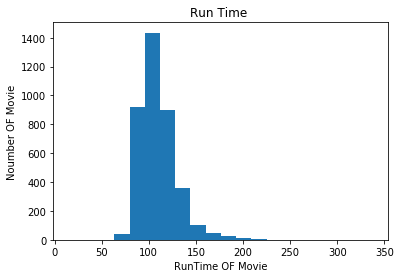

In [34]:
plt.hist(sortedData['runtime'],bins = 20);
plt.xlabel('RunTime OF Movie');
plt.ylabel('Noumber OF Movie');
plt.title("Run Time ");

most of movies lie in the range of 80 to 120 minutes  graph is right  skeweed
with mean less than 109  and median  approx 107 and mode 100 

In [35]:
sortedData['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

25% of our data is less than 95 minutes

50% less than 106 minutes

75% less than 119 minutes

4:What is The Relation between revenue and budget

correlation: (0.688403190452271, 0.0)


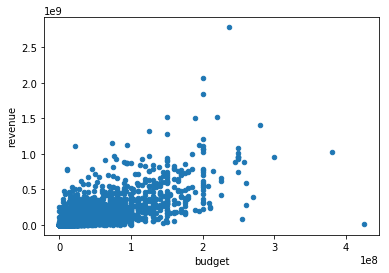

In [36]:

sortedData.plot(x ='budget',y = 'revenue', kind = 'scatter');
print("correlation:",scipy.stats.pearsonr(sortedData.budget,sortedData.revenue));




Correlation = (0.688403190452271) which is good correlation and also positive

### 5:what is the successful genres?

we will use large profit of our data to rpresent that this movie is more viewd 

In [37]:
newDf = sortedData[sortedData['profit']>40000000];
#make index
#newDf.index = range(newDf.shape[0]);
newDf.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,year,month,day,profit
10143,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,Spartacus is a 1960 American historical drama ...,197.0,Action|Drama|History,Bryna Productions,2060-10-06,211,6.9,1970-01-01 00:00:00.000001960,2060,10,Wednesday,48000000.0
10110,12230,2.631987,4000000.0,215880014.0,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,When a litter of dalmatian puppies are abducte...,79.0,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,913,6.6,1970-01-01 00:00:00.000001961,2061,1,Tuesday,211880014.0
9849,646,3.170651,1100000.0,59600000.0,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,NOW meet the most extraordinary gentleman spy ...,"In the film that launched the James Bond saga,...",110.0,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,1970-01-01 00:00:00.000001962,2062,10,Wednesday,58500000.0
9850,947,1.168767,15000000.0,70000000.0,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,A Mighty Motion Picture Of Action And Adventure!,An epic about British officer T.E. Lawrence's ...,216.0,Adventure|Drama|History|War,Horizon Pictures (II),2062-12-10,517,7.5,1970-01-01 00:00:00.000001962,2062,12,Sunday,55000000.0
10438,657,2.508235,2500000.0,78898765.0,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,The world's masters of murder pull out all the...,Agent 007 is back in the second installment of...,115.0,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2063-10-11,458,6.7,1970-01-01 00:00:00.000001963,2063,10,Thursday,76398765.0


In [38]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = newDf[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    countM = data.value_counts(ascending = False)
    
    return countM
countM = data('genres')
countM

Drama              552
Comedy             542
Action             503
Thriller           452
Adventure          402
Romance            244
Family             242
Crime              227
Science Fiction    218
Fantasy            212
Horror             141
Animation          129
Mystery            121
Music               53
War                 49
History             46
Western             16
Documentary          5
Foreign              1
dtype: int64

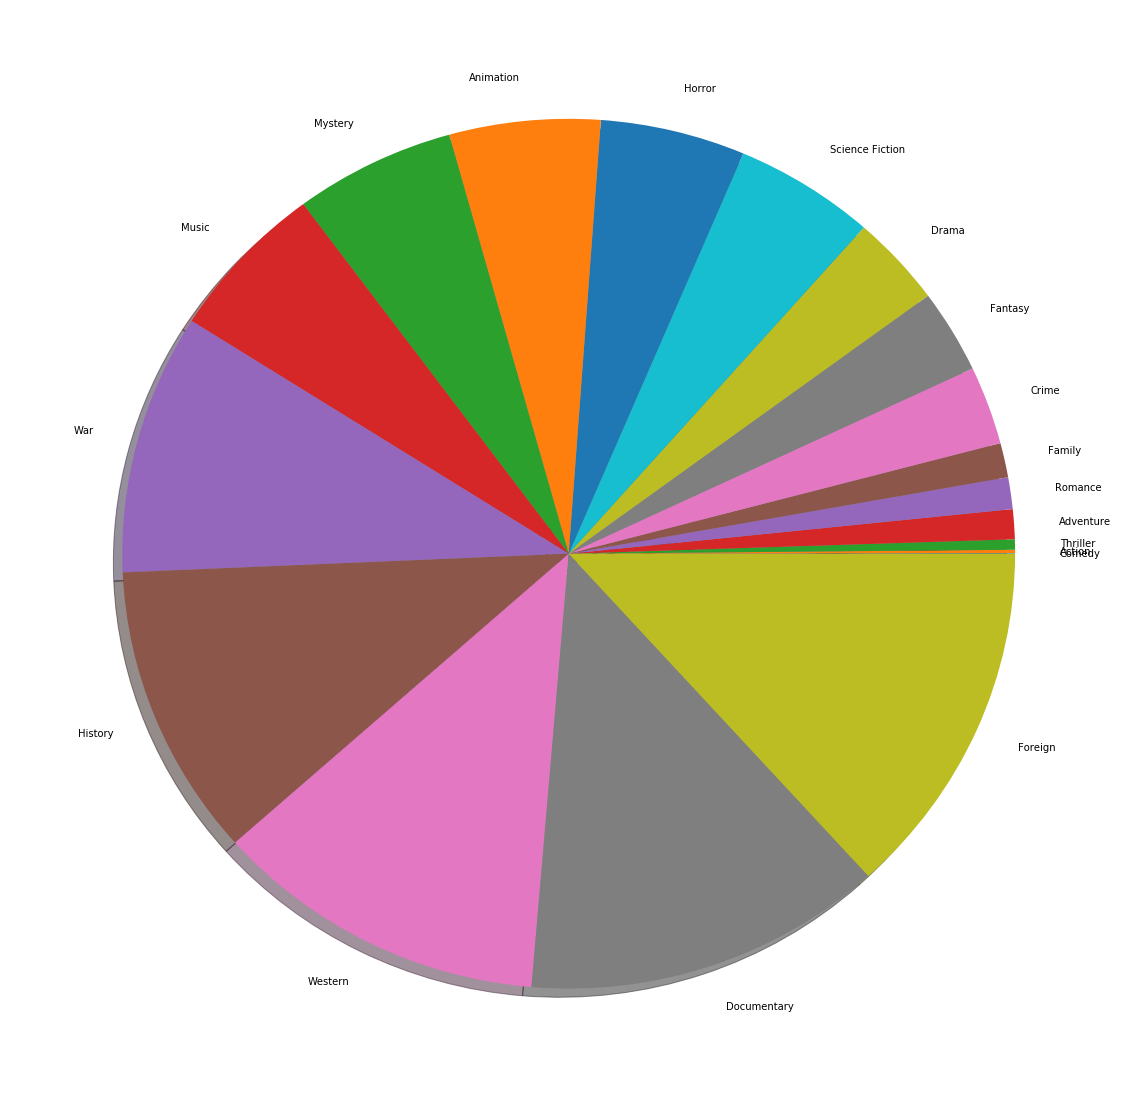

In [61]:
#lets plot the points in descending order top to bottom as we have data in same format.
countM.sort_values(ascending = True, inplace = True)
mylabels = ['Comedy','Action','Thriller','Adventure','Romance','Family','Crime','Fantasy','Drama','Science Fiction','Horror' ,'Animation' ,'Mystery', 'Music', 'War' ,'History' , 'Western' ,'Documentary','Foreign']
#ploting
plt.pie(countM, labels=mylabels,shadow = True)
#ploting the graph
fig = plt.gcf()
fig.set_size_inches(20,20) 
plt.show()

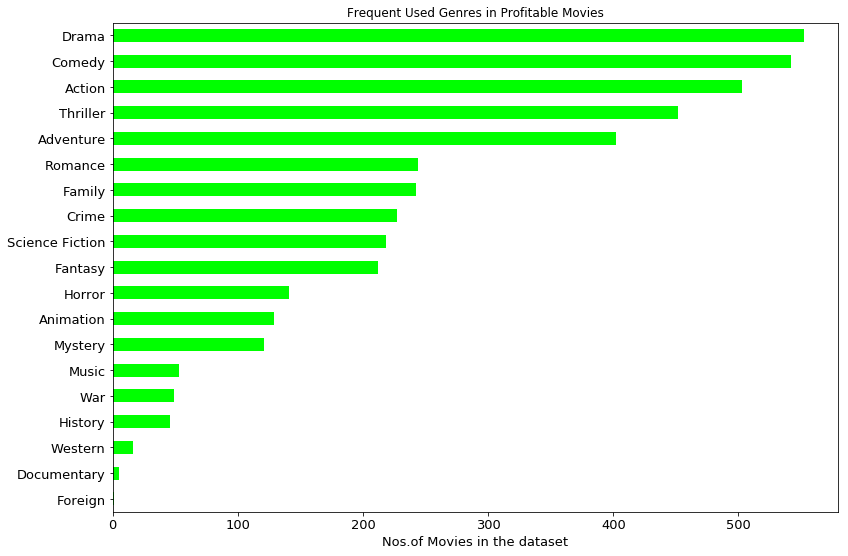

In [67]:
countM.sort_values(ascending = True, inplace = True)

#ploting
countM.plot.barh(color = '#00FF00', fontsize = 13)

#title
plt.title('Frequent Used Genres in Profitable Movies')

# on x axis
plt.xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
#plt.figure.set_size_inches(12, 9)
fig = plt.gcf()
fig.set_size_inches(13,9)
#ploting the graph
plt.show()

Drama has the large number of view

Foreign is the smallest one 

<a id='conclusions'></a>
## Conclusions

###  1 (what is the score of the movie)
I get the score column and add it to the dataset.
The Shawshank Redemption has largest score  
original_title	           vote_count	 vote_average	score
The Shawshank Redemption	5754	       8.4	        7.970346






## 2 (what is the profit for each movie):
i get the profit column 
minimum profit is -413912431 which mean this movie not have any success (The Warrior's Way) 
max profit is 2544505847 for Enter the World of Pandora movie

### 3:what is the longest runtime and minimum
    
    longest runtime is 338 minutes
    15 minutes is the lowest time 
  
most of movies lie in the range of 80 to 120 minutes  graph is right  skeweed
with mean less than 109  and median  approx 107 and mode 100 


25% of our data is less than 95 minutes

50% less than 106 minutes

75% less than 119 minutes
### 4:what is the relationship between revenue and budget

correlation: (0.688403190452271, 0.0) 
68% not strong relationship but positive (good )


### 5:what is the successful genres?

Drama ,comedy and action has the large number of view

 wastern and Foreign is the smallest one 
 For a Movie to be  successful :
 should be in Drama ,comedy and action
 Average duration of the movie must be 113 minutes



###  Data Limitations
This analysis was done considering the movies which had a significant amount of profit of around 40 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date.budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0